### Zielfunktionen und Joint Inversion

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pygimli as pg
from pygimli.physics.ert import VESModelling
from objfun import showPhiD

Wir betrachten eine Schlumberger-Sondierung mit AB/2-Werten zwischen 3 und 1000m.

In [2]:
ab2 = np.logspace(0.5, 3, 50)
ves = VESModelling(ab2=ab2, mn2=ab2/3)

Wir betrachten ein 3-Schicht-Modell mit einem guten Leiter eingebettet in einen schlecht leitfähigen Halbraum bzw. einem schlechten Leiter im leitfähigen Halbraum.

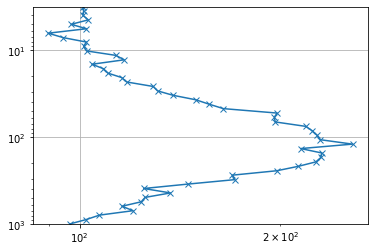

In [7]:
model = [20, 20, 100, 1000, 100]  # d1, d2, r1, r2, r3
data = ves.response(model)
error = 0.05
data *= np.random.randn(len(data)) * error + 1.0
fig, ax = plt.subplots()
ax.loglog(data, ab2, "x-");
ax.set_ylim(max(ab2), min(ab2))
plt.grid()

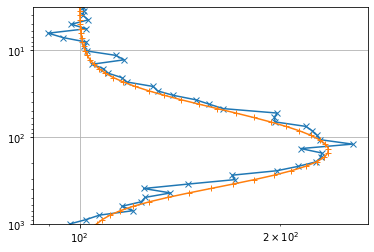

In [11]:
model[1] += 10  # d2
model[3] *= 2  # rho2
response = ves.response(model)
fig, ax = plt.subplots()
ax.loglog(data, ab2, "x-");
ax.loglog(response, ab2, "+-");
ax.set_ylim(max(ab2), min(ab2))
plt.grid()

In [12]:
phiD = lambda x, y, err: np.sum((np.log(x)-np.log(y))**2/err**2)
print("phiD=", phiD(data, response, error))
print("chi2=", phiD(data, response, error)/len(data))

phiD= 95.64638067300979
chi2= 1.9129276134601958


Wir betrachten jetzt eine ganze Reihe von Werten für d2 und rho2 und speichern die Zielfunktion in einer Matrix ab, die dann mit `showPhiD` gezeigt wird.

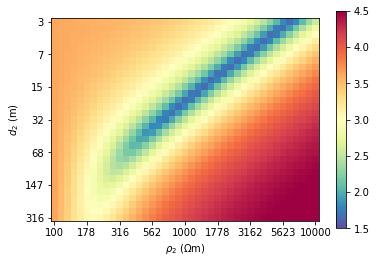

In [13]:
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(2, 4, 41)
M = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M[i, j] = phiD(data, ves.response(model), error)

showPhiD(res2, thk2, M);

Wir berechnen nun die Gleiche Zielfunktion für den Fall einer elektromagnetischen Frequenzsondierung mit einer Helikopter/RESOLVE Geometrie.

In [14]:
f = np.logspace(2, 5, 10)
fop = pg.core.FDEM1dModelling(3, f, 10., 50)
model = [20, 20, 100, 1000, 100]  # d1, d2, r1, r2, r3
dataEM = fop.response(model)
errorEM = 0.1
dataEM += np.random.randn(len(dataEM)) * errorEM

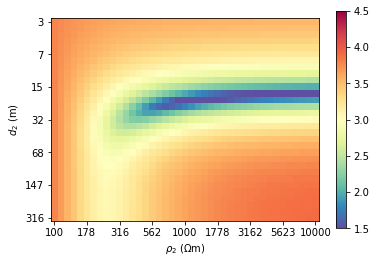

In [15]:
phiD = lambda x, y, err: np.sum((x-y)**2/err**2)
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(2, 4, 41)
M2 = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M2[i, j] = phiD(dataEM, fop.response(model), errorEM)

showPhiD(res2, thk2, M2);

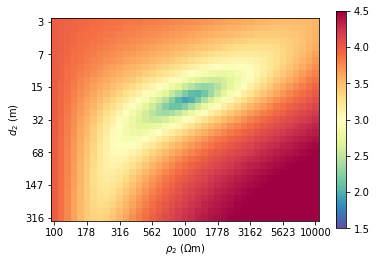

In [9]:
M = M + M2
showPhiD(res2, thk2, M);

In [10]:
it, ir = np.nonzero(M == np.min(M))
print(thk2[it], res2[ir])

[19.95262315] [1000.]
